In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import numpy as np

In [2]:
iris = load_iris()
x = iris.data
y = iris.target
y[y != 0] = 1

In [3]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [5]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
logreg.score(x_test, y_test)

1.0

In [6]:
decision_score = logreg.decision_function(x_test)

In [7]:
y_pred = logreg.predict(x_test)
y_pred

array([1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0])

In [8]:
decision_score

array([ 5.38721628, -3.14019192, 12.12904246,  5.08756893,  6.09124352,
       -3.26472414,  2.74005507,  7.35659525,  5.79449685,  3.5759283 ,
        6.82194435, -3.66251149, -3.93689724, -3.48704954, -3.83970853,
        5.39532122,  8.73300989,  3.57633768,  4.86483414,  8.42484821,
       -3.34826421,  6.20227596, -3.21430134,  8.33323817,  9.76711536,
        7.5813144 ,  8.89595381,  8.99683437, -3.47929142, -3.21673006])

In [9]:
sort_list = np.sort(decision_score)

In [10]:
precision_list = []
recall_list = []
from sklearn.metrics import precision_score, recall_score

In [11]:
for i, decision in enumerate(sort_list):
    y_pred = np.array(decision_score >= decision, dtype='int')
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision_list.append(precision)
    recall_list.append(recall)


In [12]:
precision_list

[0.6666666666666666,
 0.6896551724137931,
 0.7142857142857143,
 0.7407407407407407,
 0.7692307692307693,
 0.8,
 0.8333333333333334,
 0.8695652173913043,
 0.9090909090909091,
 0.9523809523809523,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

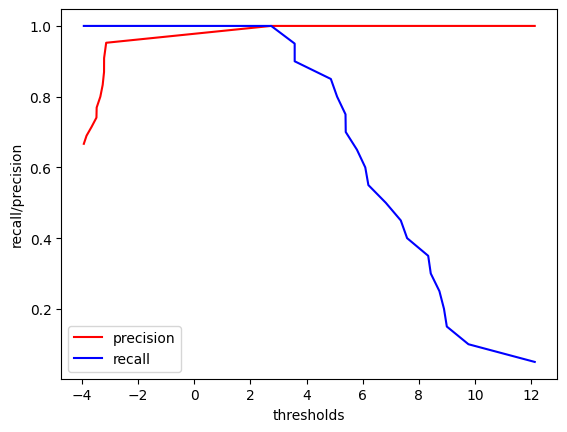

In [13]:
plt.plot(sort_list, precision_list, color='red', label='precision')
plt.plot(sort_list, recall_list, color='blue', label='recall')
plt.ylabel('recall/precision')
plt.xlabel('thresholds')
plt.legend(loc='best')
plt.show()# 在不同的阈值下，precision 和 recall 的变化

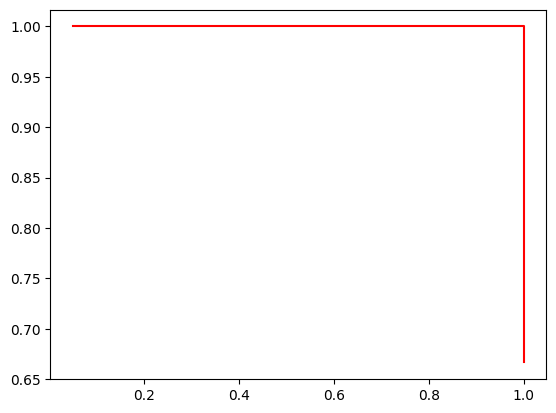

In [16]:
plt.plot(recall_list,precision_list, color='red', label='precision')

In [46]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, decision_score)

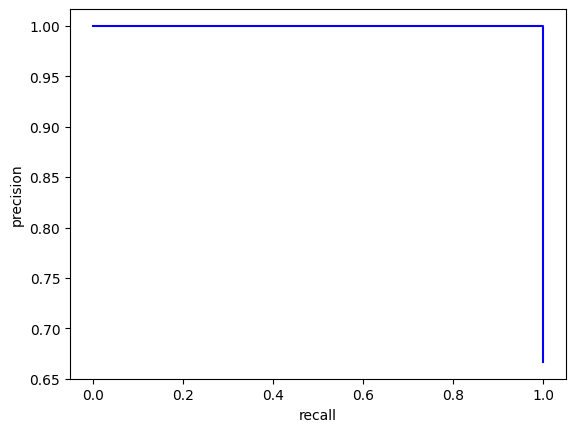

In [19]:
plt.plot(recall, precision, color='blue', label='precision')
plt.xlabel('recall')
plt.ylabel('precision')
# plt.legend(loc='best')
plt.show()

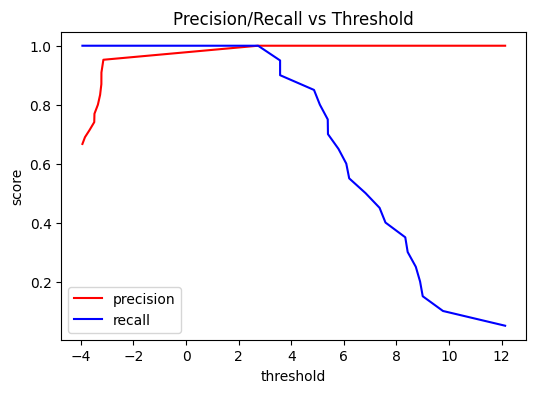

array([-3.93689724, -3.83970853, -3.66251149, -3.48704954, -3.47929142,
       -3.34826421, -3.26472414, -3.21673006, -3.21430134, -3.14019192,
        2.74005507,  3.5759283 ,  3.57633768,  4.86483414,  5.08756893,
        5.38721628,  5.39532122,  5.79449685,  6.09124352,  6.20227596,
        6.82194435,  7.35659525,  7.5813144 ,  8.33323817,  8.42484821,
        8.73300989,  8.89595381,  8.99683437,  9.76711536, 12.12904246])

In [18]:
# python
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# 假设已存在 y_test, decision_score
precision, recall, thresholds = precision_recall_curve(y_test, decision_score)
# ap = average_precision_score(y_test, decision_score)

# 1) precision / recall 随阈值变化（thresholds 长度 = len(precision)-1）
plt.figure(figsize=(6,4))
plt.plot(thresholds, precision[:-1], color='red', label='precision')
plt.plot(thresholds, recall[:-1], color='blue', label='recall')
plt.xlabel('threshold')
plt.ylabel('score')
plt.legend(loc='best')
plt.title('Precision/Recall vs Threshold')
plt.show()

thresholds

In [51]:
from sklearn.metrics import roc_curve, auc
TPR, FPR, thresholds = roc_curve(y_test, decision_score)

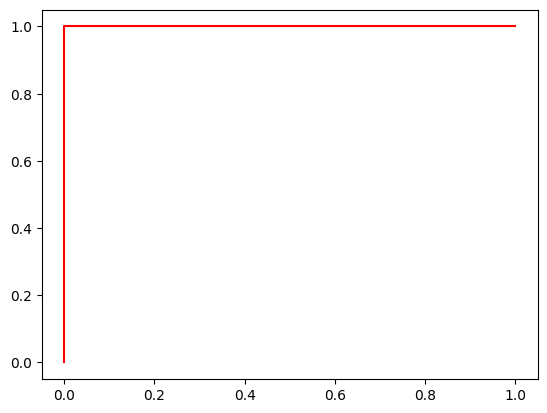

In [52]:
plt.plot(TPR, FPR, color='red', label='TPR')


In [73]:
from sklearn.datasets import make_classification

In [77]:
X,Y = make_classification(
    n_samples=500,  # 样本数
    n_features=10,  # 特征数（无关紧要，主要用标签和预测分数）
    n_informative=5,  # 有效特征数
    n_redundant=2,  # 冗余特征数
    n_classes=2,  # 二分类
    weights=[0.8],  # 负类占80%，正类占20%
    random_state=42
)

In [80]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [86]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
logreg.score(x_test, y_test)
decision_score = logreg.decision_function(x_test)

In [97]:
TPR, FPR, roc_thresholds = roc_curve(y_test, decision_score)

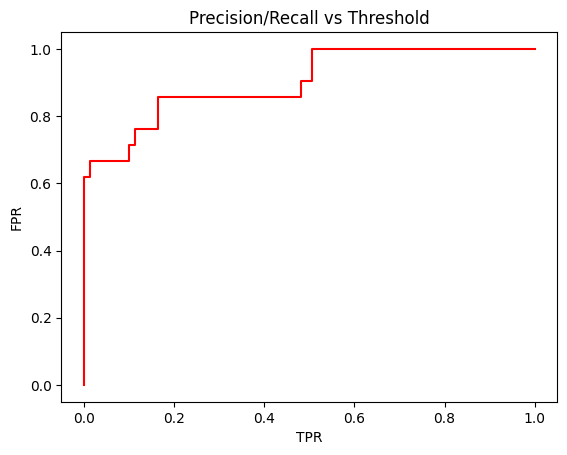

In [98]:
plt.plot(TPR, FPR, color='red', label='TPR')
plt.xlabel('TPR')
plt.ylabel('FPR')
# plt.legend(loc='best')
plt.title('Precision/Recall vs Threshold')
plt.show()

In [99]:
precision, recall, pr_thresholds = precision_recall_curve(y_test, decision_score)

Text(0.5, 1.0, 'Precision/Recall vs Threshold')

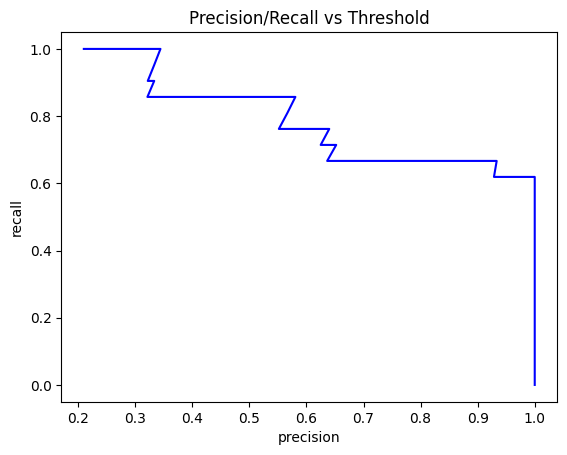

In [100]:
plt.plot(precision, recall, color='blue', label='precision')
plt.xlabel('precision')
plt.ylabel('recall')
plt.title('Precision/Recall vs Threshold')

NameError: name 'roc_thresholds' is not defined

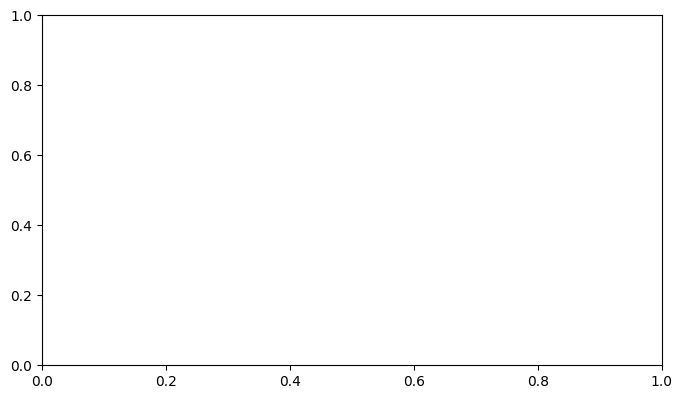

In [8]:
import matplotlib.pyplot as plt

# 假设已通过之前的代码计算得到以下变量：
# fpr, tpr, roc_thresholds（来自roc_curve）
# precision, recall, pr_thresholds（来自precision_recall_curve）

# 创建2行1列的子图（上下布局）
plt.figure(figsize=(8, 10))  # 画布大小，高度稍大适配两个子图

# 第1个子图：TPR和FPR随阈值的变化
plt.subplot(2, 1, 1)  # 2行1列的第1个位置
plt.plot(roc_thresholds, TPR[:], color='red', label='TPR (真正例率)')  # tpr比thresholds长1，取前n-1个
plt.plot(roc_thresholds, FPR[:], color='blue', label='FPR (假正例率)')   # fpr同样取前n-1个
plt.xlabel('阈值（Threshold）')
plt.ylabel('指标值')
plt.title('TPR/FPR 随阈值的变化')
plt.legend(loc='best')
plt.grid(alpha=0.3)  # 加网格更易读

# 第2个子图：Precision和Recall随阈值的变化
plt.subplot(2, 1, 2)  # 2行1列的第2个位置
plt.plot(pr_thresholds, precision[:-1], color='green', label='Precision (精确率)')
plt.plot(pr_thresholds, recall[:-1], color='orange', label='Recall (召回率)')
plt.xlabel('阈值（Threshold）')
plt.ylabel('指标值')
plt.title('Precision/Recall 随阈值的变化')
plt.legend(loc='best')
plt.grid(alpha=0.3)

# 调整子图间距，避免标题/标签重叠
plt.tight_layout()

# 最后统一显示所有子图
plt.show()